### Итоговая работа

**Задание 1**\
Загрузите файл HR.csv в pandas dataframe 

In [1]:
import pandas as pd
import numpy as np
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
url = 'https://raw.githubusercontent.com/Viktor-89/X_Project/main/HR.csv'
df = pd.read_csv(url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

**Задание 2**\
Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Видим, что данных много, нет пропусков, два объектных столбца (department и salary), два столбца с плавающей точкой (satisfaction_level и last_evaluation), остальные столбцы с целочисленными данными

In [4]:
# Среднее, мин/макс
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Медиана
df.median(numeric_only = True)

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

По квантилям, медиане наблюдаем некоторое смещение данных в сторону максимальных значений, в остальном на данный момент исследования нормальные данные высокого качества

In [6]:
# Мода
df.mode(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


In [7]:
# Среднее абсолютное отклонение
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident',
      'left', 'promotion_last_5years']].apply(robust.mad)

satisfaction_level        0.281694
last_evaluation           0.222390
number_project            1.482602
average_montly_hours     65.234498
time_spend_company        1.482602
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
dtype: float64

In [8]:
# По стат показателям и описанию df похоже, что столбцы «Work_accident», «left», «promotion_last_5years» 
# являются категориальными, проверим количество уникальных значений
df[['Work_accident', 'left', 'promotion_last_5years']].agg(['nunique'])

,Work_accident,left,promotion_last_5years
nunique,2,2,2


Подтверждаем гипотезу, что столбцы «Work_accident», «left», «promotion_last_5years» являются категориальными

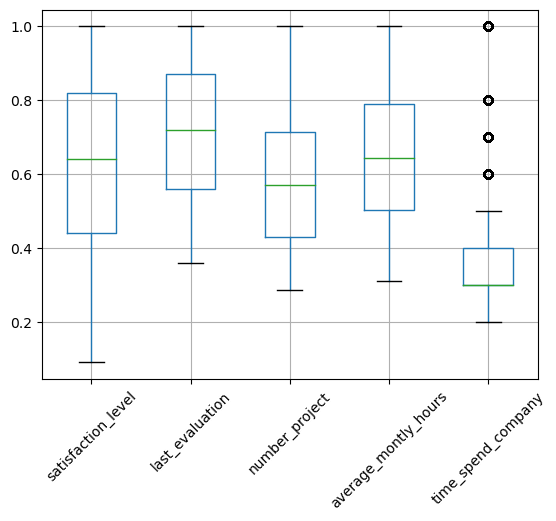

In [9]:
# Визуализирум основные статистические показатели количественных данных, для чего 
# нормализуем данные используя максимально абсолютное масштабирование и построим boxplot

df_x = df.select_dtypes(include = np.number)
for column in df_x.columns:
    df_x[column] = df_x[column] / df_x[column].abs().max()

boxplot = df_x.boxplot(column=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                               'time_spend_company'], return_type = 'axes', rot = 45)
plt.show()

Подтверждаем ранее сделанный вывод о смещении данных в сторону максимальных значений, наблюдаем выбросы по столбцу со стажем работы в компании в годах, которые не являются ошибками, т.к. максимальное значение по столбцу 10 лет, соответственно это естественные значения.

**Задание 3**\
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

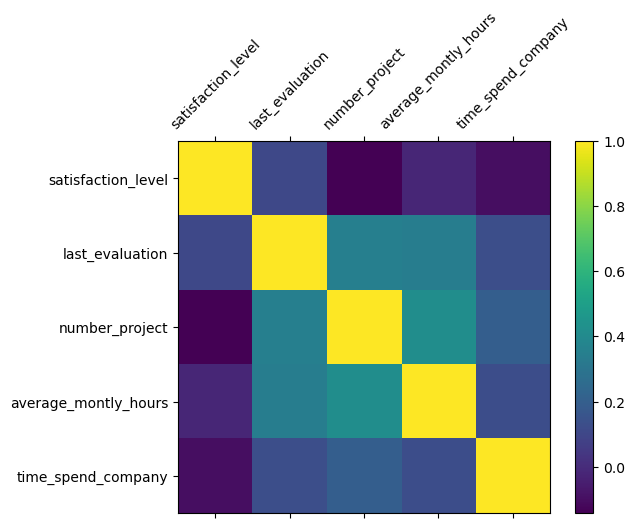

In [10]:
df_y = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
f = plt.figure()
plt.matshow(df_y.corr(), fignum = f.number)
plt.xticks(range(df_y.shape[1]), df_y.columns, rotation = 45)
plt.yticks(range(df_y.shape[1]), df_y.columns)
cb = plt.colorbar()
plt.show()

Согласно матрице:\
Две самые скоррелированные переменные:
- number_project - time_spend_company\
***аналогично***
- number_project - average_monthly_hours

Две наименее скоррелированные переменные:
- number_project - satisfaction_level\
***аналогично***
- satisfaction_level - average_monthly_hours

Видим логичную корреляцию:
- количество проектов, выполненных за время работы - стаж работы в компании в годах;
- количество проектов, выполненных за время работы - среднее количество часов на рабочем месте в месяц;
- количество проектов, выполненных за время работы - уровень удовлетворенности работой;
- среднее количество часов на рабочем месте в месяц - уровень удовлетворенности работой.

Однако делать выводы о влиянии одного показателя на другой рано.

**Задание 4**\
Рассчитайте сколько сотрудников работает в каждом департаменте.

Учитывая, что в задании указано **«работает»** и в признаках столбец **«left»** ознечает **уволился** ли сотрудник, следовательно считаем без уволенных

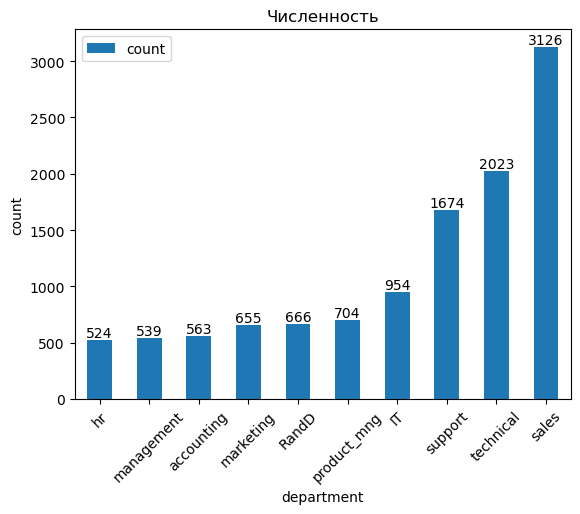

In [113]:
df_z = df[df.left != 1].groupby('department')['department'].count().to_frame('count').sort_values('count')
df_z.plot(kind = 'bar', title = 'Численность', xlabel = 'department', ylabel = 'count')
plt.xticks(rotation = 45)
for i, val in enumerate(df_z.values):
    plt.text(i, val, int(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'size':10})
plt.show()

In [54]:
# Проверим корректное исллючение уволенных 
print(df['left'].value_counts())
print(df_z['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64
left
0    11428
Name: count, dtype: int64


**Задание 5**\
Показать распределение сотрудников по зарплатам.

Учитывая, что формулировка задания не конкретизирует **работающих/уволенных**, следовательно считаем всех сотрудников

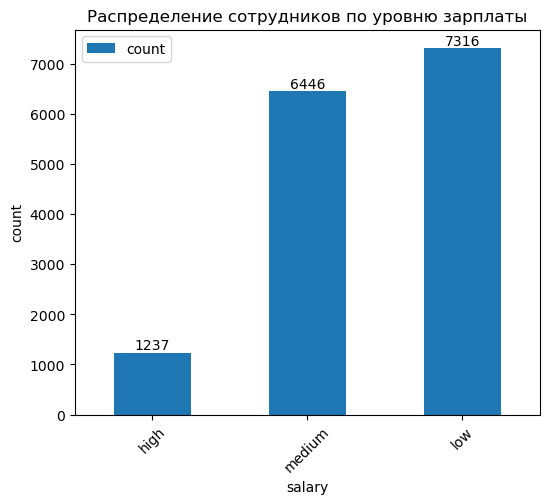

In [126]:
df_w = df.groupby('salary')['salary'].count().to_frame('count').sort_values('count')
df_w.plot(kind = 'bar', title = 'Распределение сотрудников по уровню зарплаты', xlabel = 'salary', ylabel = 'count', figsize=(6, 5))
plt.xticks(rotation = 45)
for i, val in enumerate(df_w.values)
    plt.text(i, val, int(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'size':10})
plt.show()

**Задание 6**\
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

Учитывая, что формулировка задания не конкретизирует **работающих/уволенных**, следовательно считаем всех сотрудников

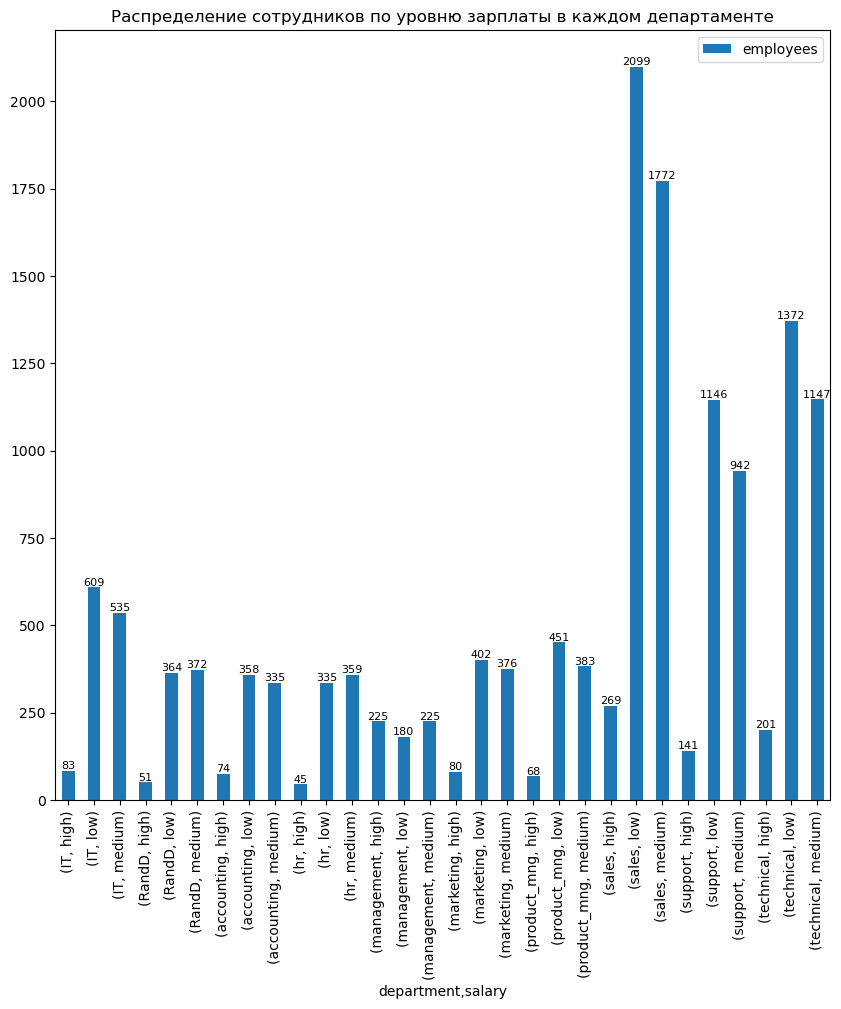

In [184]:
df_q = df.groupby([df['department'],df['salary']])[['salary']].count()
df_q.columns = ['employees']
df_q.sort_values(by = 'employees', ascending=False)
df_q.plot(kind = 'bar', title = 'Распределение сотрудников по уровню зарплаты в каждом департаменте', figsize = (10, 10))
for i, val in enumerate(df_q.values):
    plt.text(i, val, int(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'size':8})
plt.show()

**Задание 7**\
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Учитывая, что формулировка задания не конкретизирует **работающих/уволенных**, следовательно считаем всех сотрудников

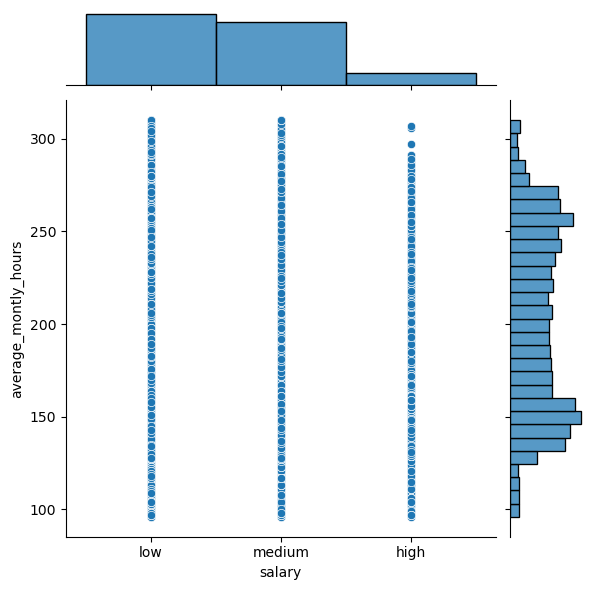

In [206]:
sns.jointplot(x = 'salary', y = 'average_montly_hours', data = df)
plt.show()

Видим, что нет ярко выраженной разницы

In [230]:
# Сформируем датафрейм и заменим значения категорий string на int 
# для дальнейшего использования при подсчете коэффициентов корреляции

df_d = df[['salary', 'average_montly_hours']]
df_c = df_d.replace(['high', 'medium', 'low'], [3, 2, 1])

# Считаем коэффициент корреляции Пирсона
df_c[['salary', 'average_montly_hours']].corr()

,salary,average_montly_hours
salary,1.000000,-0.002242
average_montly_hours,-0.002242,1.000000


In [231]:
# Считаем коэффициент корреляции Спирмана
df_c[['salary', 'average_montly_hours']].corr(method='spearman')

,salary,average_montly_hours
salary,1.000000,0.002452
average_montly_hours,0.002452,1.000000


In [232]:
# Считаем коэффициент корреляции Кенделла
df_c[['salary', 'average_montly_hours']].corr(method='kendall')

,salary,average_montly_hours
salary,1.000000,0.001896
average_montly_hours,0.001896,1.000000


Видим, околонулевые коэффициенты что показывает очень низкую степень взаимосвязи (практически ее отсутствие) и соответственно опровергет гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

**Задание 8**\
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [244]:
# Делим данные
df_l_0 = df.loc[df['left'] == 0]
df_l_1 = df.loc[df['left'] == 1]

# Доля сотрудников с повышением за последние 5 лет
print(len(df_l_0.loc[df_l_0['promotion_last_5years'] == 1]) / len(df_l_0) * 100, '- доля не уволившихся сотрудников с повышением за последние 5 лет')
print(len(df_l_1.loc[df_l_1['promotion_last_5years'] == 1]) / len(df_l_1) * 100, '- доля уволившихся сотрудников с повышением за последние 5 лет')

# Средняя степень удовлетворенности
print(df_l_0['satisfaction_level'].mean(), '- средняя степень удовлетворенности не уволившихся сотрудников')
print(df_l_1['satisfaction_level'].mean(), '- средняя степень удовлетворенности уволившихся сотрудников')

# Среднее количество проектов
print(df_l_0['number_project'].mean(), '- среднее количество проектов не уволившихся сотрудников')
print(df_l_1['number_project'].mean(), '- среднее количество проектов уволившихся сотрудников')

2.6251312565628284 - доля не уволившихся сотрудников с повышением за последние 5 лет
0.5320638476617194 - доля уволившихся сотрудников с повышением за последние 5 лет
0.666809590479524 - средняя степень удовлетворенности не уволившихся сотрудников
0.4400980117614114 - средняя степень удовлетворенности уволившихся сотрудников
3.786664333216661 - среднее количество проектов не уволившихся сотрудников
3.8555026603192384 - среднее количество проектов уволившихся сотрудников


Наблюдается интересный перекос, показатели **средняя степень удовлетворенности** и **доля сотрудников с повышением за последние 5 лет** выше у не уволившихся сотрудников, однако **среднее количество проектов** выше у уволившихся сотрудников. Вариантов много, возможно более простые проекты, в том числе в зависимости от отделов, недостаточно данных для точных утверждений.

**Задание 9**\
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [284]:
# Сформируем данные
df_L = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
             'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_class = pd.array(df['left'])

In [285]:
# Разделим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_L, data_class, random_state = 42)

In [286]:
# Построим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [287]:
# Прогноз на тестовой выборке
X_test_predict = lda.predict(X_test)
X_test_predict

array([0., 0., 0., ..., 0., 1., 0.])

In [288]:
# Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [289]:
result.head(500)

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,1.0,0.0
497,0.0,0.0
498,0.0,0.0


In [290]:
# Оценим модель
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [ ]:
Качество модели не 1 т.к. при большом количестве данных, зависимых с увольнением немного.